<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_sprint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint Machine Learning Scratch Linear Regression

## Scratch Linear Regression class

In [175]:
import numpy as np

class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True: If no bias term is included
    verbose : bool
      True: Output learning process
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.iter,)
      Record loss on Training data
    self.val_loss : ndarray, shape (self.iter,)
      Record loss on Validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.coef_ = None
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function
        @Parameters
            X : ndarray, shape (n_samples, n_features)
                Training data
        @Returns
            ndarray, shape (n_samples,)
            Estimated result by linear hypothetical function
        """
        h = X @ self.coef_
        return h

    def _gradient_descent(self, X, y, error=None):
        y_pred = self._linear_hypothesis(X)
        grads = (y_pred - y) @ X / X.shape[0]
        self.coef_ = self.coef_ - self.lr * grads
    
    def objective_func(self, X, y):
        y_pred = self._linear_hypothesis(X)
        J = ((y_pred - y) ** 2).sum() / (2 * y.shape[0])
        return J
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. 
        If validation data is entered, the loss and accuracy are calculated for each iteration.
        @Parameters
            X : ndarray, shape (n_samples, n_features)
                Features of training data
            y : ndarray, shape (n_samples, )
                Correct answer value of training data
            X_val : ndarray, shape (n_samples, n_features)
                Features of verification data
            y_val : ndarray, shape (n_samples, )
                Correct value of verification data
        """
        if not self.no_bias:
            X = np.hstack((X, np.ones(X.shape[0])[:, np.newaxis]))
            if X_val is not None and y_val is not None:
                X_val = np.hstack((X_val, np.ones(X_val.shape[0])[:, np.newaxis]))

        self.coef_ = np.ones(X.shape[1])
        for i in range(self.iter):
            self.loss[i] = self.objective_func(X, y)
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self.objective_func(X_val, y_val)
            
            if self.verbose:
                print("-" * 10, f"Epoch {i}", "-" * 10)
                print("Weight:", self.coef_)
                print("Train loss:", self.loss[i])
                if X_val is not None and y_val is not None:
                    print("Validation loss:", self.val_loss[i])
            self._gradient_descent(X, y)
        
    def predict(self, X):
        """
        Estimate using linear regression.
        @Parameters
            X : ndarray, shape (n_samples, n_features)
                sample
        @Returns
            ndarray, shape (n_samples, )
            Estimated result by linear regression
        """
        if not self.no_bias:
            X = np.hstack((X, np.ones(X.shape[0])[:, np.newaxis]))
        return self._linear_hypothesis(X)

## [Problem 4] Mean squared error

In [176]:
def MSE(y_pred, y):
    """
    Calculation of mean square error
    @Parameters
        y_pred : ndarray, shape (n_samples,)
            Estimated value
        y : ndarray, shape (n_samples,)
            Correct answer value
    @Returns
        mse : numpy.float
            Mean squared error
    """
    mse = ((y_pred - y) ** 2).sum() / y.shape[0]
    return mse

## [Problem 6] Learning and estimation

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    return X_train, X_val, y_train, y_val

def train_and_validate(X_train, X_val, y_train, y_val, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{model_name}: {MSE(y_pred, y_val)}")

Load House Prices dataset

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("sample_data/train.csv")
print(data.head())

X, y = data[["GrLivArea", "YearBuilt"]].values, data["SalePrice"].values

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [179]:
preprocessed_data = preprocess(X, y)

from sklearn.linear_model import SGDRegressor

scratch_model = ScratchLinearRegression(10000, 0.001, False, False)
sklearn_model = SGDRegressor(max_iter=10000, learning_rate='constant', 
                             eta0=0.001, random_state=0)

train_and_validate(*preprocessed_data, scratch_model, "Scratch Linear Regressor")
train_and_validate(*preprocessed_data, sklearn_model, "Sklearn Linear Regressor")

Scratch Linear Regressor: 2942013250.9837155
Sklearn Linear Regressor: 2956606709.787162


## [Problem 7] Learning curve plot

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_learning_curve(train_loss, val_loss=None):
    plt.figure(figsize=(16, 8))
    plt.plot(train_loss, label="train_loss", linewidth=5)
    if val_loss is not None:
        plt.plot(val_loss, label="val_loss", linewidth=5)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

def train_and_visualize(X_train, y_train, X_val, y_val, model, model_name):
    model.fit(X_train, y_train, X_val, y_val)
    y_pred = model.predict(X_val)
    print(f"{model_name}: {MSE(y_pred, y_val)}")

    plot_learning_curve(model.loss, model.val_loss)

Scratch Linear Regressor: 2939128840.7751737


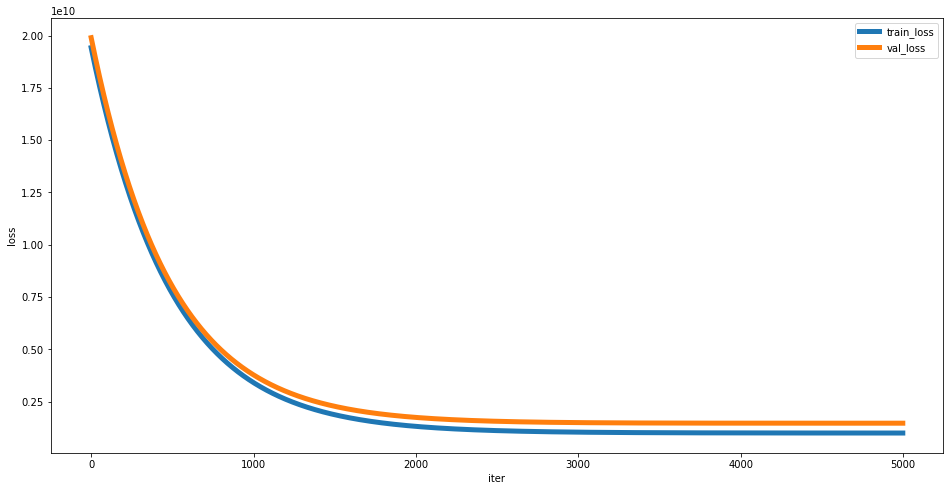

In [181]:
scratch_model = ScratchLinearRegression(5000, 0.001, False, False)
X_train, X_val, y_train, y_val = preprocess(X, y)

train_and_visualize(X_train, y_train, X_val, y_val, scratch_model, "Scratch Linear Regressor")

## [Problem 8] (Advance task) Removal of bias term

Bias MSE: 2939128840.7751737


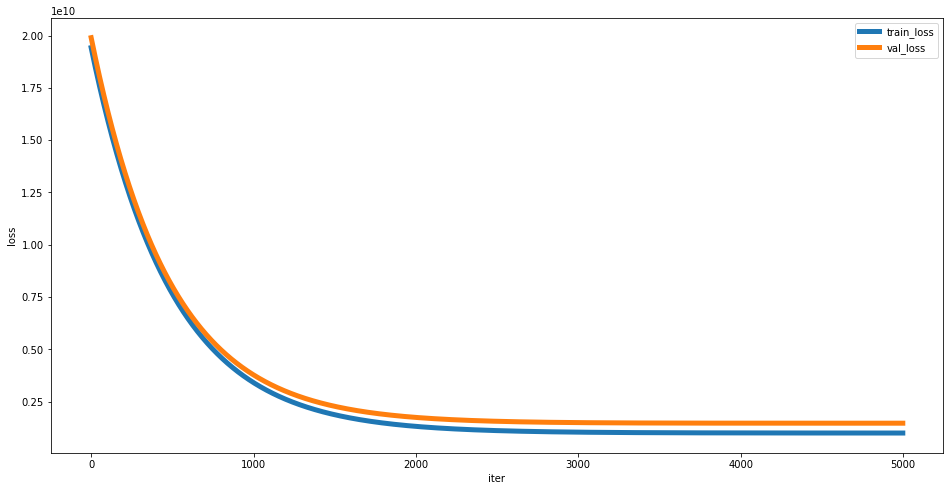

No bias MSE: 35732775219.52835


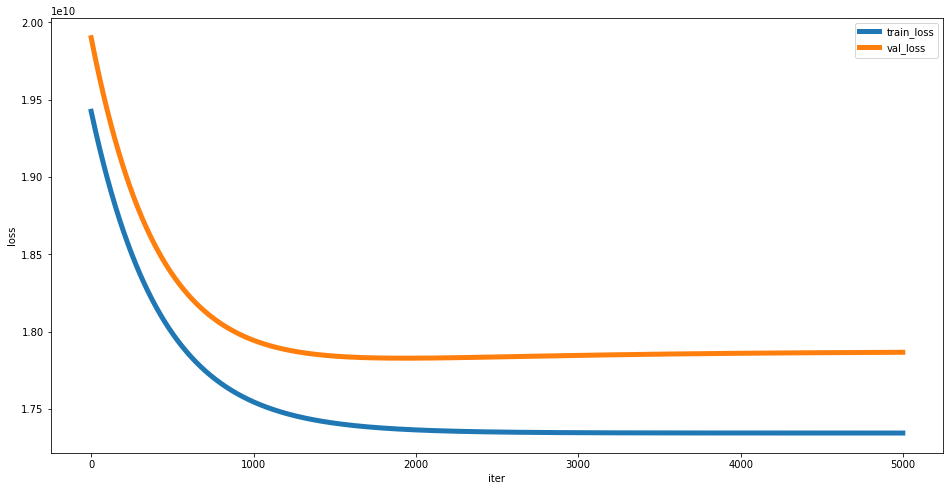

In [182]:
X_train, X_val, y_train, y_val = preprocess(X, y)

bias_model = ScratchLinearRegression(5000, 0.001, False, False)
nobias_model = ScratchLinearRegression(5000, 0.001, True, False)

train_and_visualize(X_train, y_train, X_val, y_val, bias_model, "Bias MSE")
train_and_visualize(X_train, y_train, X_val, y_val, nobias_model, "No bias MSE")

Without bias term, the line/hyperplane always pass through coordinate origin, which requires data be centered around the origin, otherwise cannot construct a good regressor line/plane. With much bigger dataset, the process of centering data can be significant, therefore bias term is used to translate the origin to the center of dataset (guarantee minimum variance of data).

## [Problem 9] (Advance task) Multidimensional feature quantity

In [183]:
def polynomial_preprocess(X, y):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Add square data
    for i in range(X.shape[1]):
        X = np.hstack((X, (X[:,i] ** 2)[:,np.newaxis]))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_val, y_train, y_val

Polynomial Regressor: 4092162069.5090666


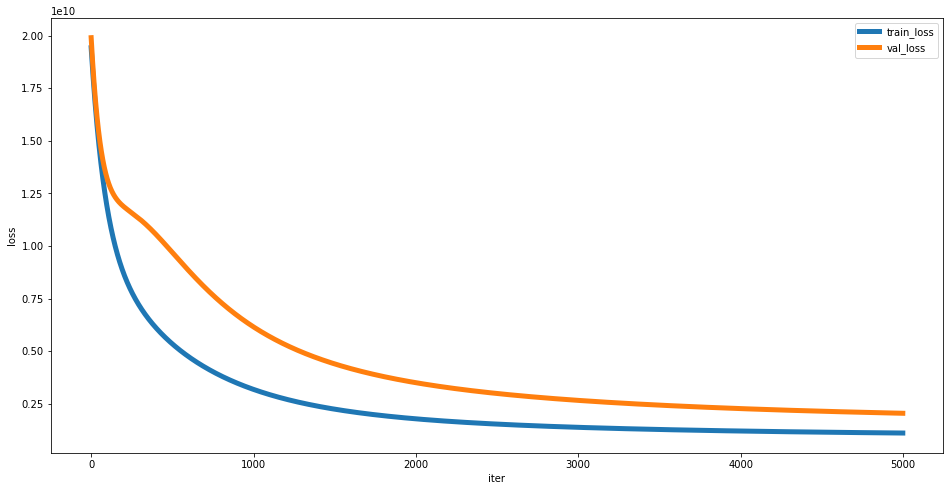

In [184]:
X_train, X_val, y_train, y_val = polynomial_preprocess(X, y)

model = ScratchLinearRegression(5000, 0.001, False, False)
train_and_visualize(X_train, y_train, X_val, y_val, model, "Polynomial Regressor")

Loss of train dataset drops faster and a bit lower than normal but at the elbow of graph (iter ~= 500), loss of validation dataset seen a weird pattern and its final loss is worse than normal. It's the phenomenon of overfitting when model performs very well on training dataset but bad on unseen data.